In [70]:
import gzip
import random
from collections import defaultdict
import numpy as np
import json
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
def parseData(fname):
    for l in open(fname):
        if l=="null":
            continue
        yield json.loads(l)

In [7]:
print("Reading data...")
data = list(parseData("modcloth_final_data.json"))
print("done")

Reading data...
done


In [8]:
len(data)

82790

In [79]:
data[:1]

[{'item_id': '123373',
  'waist': '29',
  'size': 7,
  'quality': 5,
  'cup size': 'd',
  'hips': 38,
  'bra size': '34',
  'category': 'new',
  'bust': '36',
  'height': '5ft 6in',
  'user_name': 'Emily',
  'length': 'just right',
  'fit': 'small',
  'user_id': '991571',
  'modHeight': 66}]

In [10]:
len(data)

82790

In [76]:
len(np.unique([d['user_id'] for d in modData]))

30223

In [77]:
len(np.unique([d['item_id'] for d in modData]))

1119

In [ ]:
len(np.unique([d['item_id'] for d in modData]))

In [11]:
len([d for d in data if "cup size" in d])

76535

In [12]:
len([d for d in data if "bra size" in d])

76772

In [13]:
len([d for d in data if "hips" in d])

56064

In [14]:
len([d for d in data if "bust" in d])

11854

In [15]:
len([d for d in data if "height" in d])

81683

In [16]:
modData = [d for d in data if "cup size" in d and "bra size" in d and "hips" in d
    and "height" in d]
len(modData)

54345

In [17]:
len(np.unique([d['cup size'] for d in modData]))

12

In [18]:
len(np.unique([d['bra size'] for d in modData]))

11

In [19]:
np.unique([d['hips'] for d in modData])

array(['30', '30.0', '31', '31.0', '32', '32.0', '33', '33.0', '34',
       '34.0', '35', '35.0', '36', '36.0', '37', '37.0', '38', '38.0',
       '39', '39.0', '40', '40.0', '41', '41.0', '42', '42.0', '43',
       '43.0', '44', '44.0', '45', '45.0', '46', '46.0', '47', '47.0',
       '48', '48.0', '49', '49.0', '50', '50.0', '51', '51.0', '52',
       '52.0', '53', '53.0', '54', '54.0', '55', '55.0', '56', '56.0',
       '57', '57.0', '58', '58.0', '59', '59.0', '60', '60.0'],
      dtype='<U4')

In [20]:
np.unique([d['height'] for d in modData])

array(['3ft', '3ft 11in', '3ft 2in', '3ft 3in', '3ft 4in', '4ft 10in',
       '4ft 11in', '4ft 2in', '4ft 5in', '4ft 7in', '4ft 8in', '4ft 9in',
       '5ft', '5ft 10in', '5ft 11in', '5ft 1in', '5ft 2in', '5ft 3in',
       '5ft 4in', '5ft 5in', '5ft 6in', '5ft 7in', '5ft 8in', '5ft 9in',
       '6ft', '6ft 1in', '6ft 2in', '6ft 3in', '6ft 4in', '6ft 5in',
       '6ft 6in', '6ft 8in', '7ft 11in', '7ft 7in'], dtype='<U8')

In [21]:
for d in modData:
    h = d['height']
    s = h.strip().split()
    ft = (int)(s[0].split('ft')[0])
    try:
        inches = (int)(s[1].split('in')[0])
    except:
        inches = 0
    finally:
        height = (ft*12) + inches 
        d['modHeight'] = height

In [22]:
for d in modData:
    d['hips'] = int((float)(d['hips']))
modData[0]

{'item_id': '123373',
 'waist': '29',
 'size': 7,
 'quality': 5,
 'cup size': 'd',
 'hips': 38,
 'bra size': '34',
 'category': 'new',
 'bust': '36',
 'height': '5ft 6in',
 'user_name': 'Emily',
 'length': 'just right',
 'fit': 'small',
 'user_id': '991571',
 'modHeight': 66}

In [23]:
catCups = np.unique([d['cup size'] for d in modData])
catCupsID = dict(zip(list(catCups),range(len(catCups))))
catCupsID

{'a': 0,
 'aa': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'dd/e': 5,
 'ddd/f': 6,
 'dddd/g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11}

In [24]:
catBra = np.unique([d['bra size'] for d in modData])
catBraID = dict(zip(list(catBra),range(len(catBra))))
catBraID

{'28': 0,
 '30': 1,
 '32': 2,
 '34': 3,
 '36': 4,
 '38': 5,
 '40': 6,
 '42': 7,
 '44': 8,
 '46': 9,
 '48': 10}

In [25]:
def featCups(d):
    feat = []
    feat = [0] * len(catCupsID)
    feat[catCupsID[d['cup size']]] = 1
    return feat

In [26]:
def featBra(d):
    feat = []
    feat = [0] * len(catBraID)
    feat[catBraID[d['bra size']]] = 1
    return feat

In [58]:
X = [[1] + featCups(d) + featBra(d) + [d['hips']] + [d['modHeight']]  for d in modData] 
y = [d['size'] for d in modData]

In [32]:
len(X[0])

26

In [33]:
N = len(X)
Xtrain = X[:N//2]
Xvalid = X[N//2:3*N//4]
Xtest = X[3*N//4:]
ytrain = y[:N//2]
yvalid = y[N//2:3*N//4]
ytest = y[3*N//4:]

In [64]:
mod = linear_model.LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)

In [69]:
Xtrain[0]

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 38,
 66]

In [66]:
y[:5]

[7, 13, 11, 11, 30]

In [67]:
mod.fit(Xtrain,ytrain)

C:\Users\Khanh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)

In [68]:
ypredValid = mod.predict(Xvalid)
# validation
TP = sum([(a==b) for (a,b) in zip(yvalid, ypredValid)])
# TN = sum([(not a and not b) for (a,b) in zip(yvalid, ypredValid)])
# FP = sum([(not a and b) for (a,b) in zip(yvalid, ypredValid)])
# FN = sum([(a and not b) for (a,b) in zip(yvalid, ypredValid)])

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

BER = 1 - 0.5*(TPR + TNR)
print("Accuracy is:", (TP)/len(yvalid))
print("C = 1000" + "; validation BER = " + str(BER))

Accuracy is: 0.0708081848962167
C = 1000; validation BER = 0.5508298755186722


ValueError: x and y must be the same size

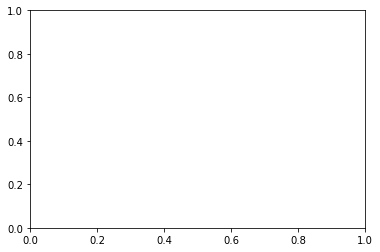

In [72]:
plt.scatter(Xvalid, ypredValid)
plt.xlabel('feature')
plt.ylabel('lable')
plt.show()